# Project on Handwritten Digit Recognition

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image

### About the Project

we have implemented a  handwritten digit recognisation app using MNIST dataset with a deep neural network that is Convolutional Neural Networks.

### The MNIST dataset

This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value

# Building the Project

#### importing the dependencies

In [41]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.math import confusion_matrix
import seaborn as sns
import cv2



Loading the MNIST data from keras.datasets and dividing into train and test data

In [4]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
type(X_train)

numpy.ndarray

Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

#### Before Normalization

In [7]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


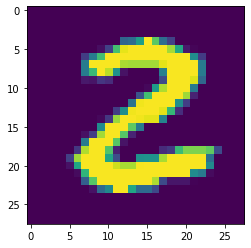

2


In [9]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### Normalizing the Data

In [12]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

#### After Normalization

In [13]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#### Resizing the image to make it suitable for applying convolutional operation

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [15]:
print('x_train shape:', X_train.shape)
print('y_train shape:',X_test.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (10000, 28, 28, 1)


In [17]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Creating the model

In [19]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [20]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                      

In [23]:
# training the Neural Network
hist = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 84s 176ms/step - loss: 0.2417 - accuracy: 0.9270 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 2/10
469/469 [==============================] - 86s 183ms/step - loss: 0.0752 - accuracy: 0.9768 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 3/10
469/469 [==============================] - 92s 196ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 88s 188ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 99s 211ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 97s 208ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0323 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 97s 206ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0303 - val_ac

Training data accuracy = 99.4%

**Evaluating the model:**

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03363963961601257
Test accuracy: 0.9912999868392944


Test data accuracy =99.1%

predicting the outcome

In [127]:
print(X_test.shape)

(10000, 28, 28, 1)


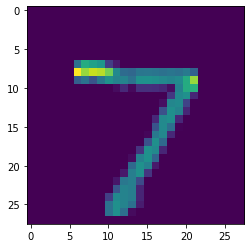

In [128]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [129]:
print(Y_test[0])

7


In [130]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 8s 27ms/step


In [131]:
print(Y_pred.shape)

(10000, 10)


In [132]:
print(Y_pred[0])

[9.4347754e-14 1.5554717e-10 9.6840050e-11 2.2079709e-08 8.5815820e-11
 1.7837601e-12 2.7238738e-17 1.0000000e+00 1.5264207e-12 7.4711330e-09]


model.predict() gives the prediction probability of each class for that data point

In [65]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [66]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

**Confusin Matrix**

In [35]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [36]:
print(conf_mat)

tf.Tensor(
[[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1131    2    1    0    0    1    0    0    0]
 [   1    0 1027    0    0    0    0    3    1    0]
 [   0    0    1 1003    0    4    0    0    2    0]
 [   0    0    0    0  976    0    3    0    0    3]
 [   1    0    0    5    0  883    2    0    1    0]
 [   6    2    0    1    1    2  945    0    1    0]
 [   0    2   12    0    0    0    0 1010    2    2]
 [   3    0    1    0    0    0    0    1  968    1]
 [   1    1    0    0    7    3    0    0    4  993]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

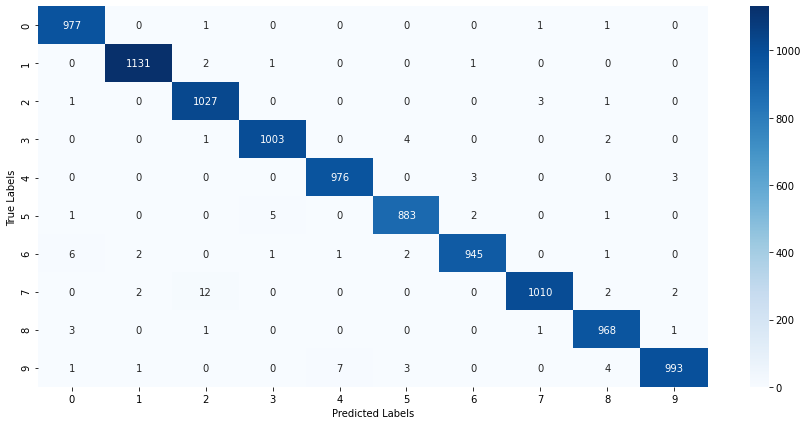

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [145]:
input_image_path = 'images/three.png'

input_image = cv2.imread(input_image_path)

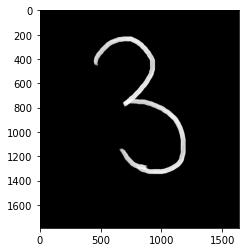

In [146]:
plt.imshow(input_image)

In [147]:
input_image.shape

(1788, 1636, 3)

In [148]:
gray=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [149]:
gray.shape

(1788, 1636)

In [150]:
resize=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [151]:
resize.shape

(28, 28)

In [152]:
newimg=tf.keras.utils.normalize(resize,axis=1)

In [153]:
newimg=np.array(newimg).reshape(-1,28,28,1)

In [154]:
newimg.shape

(1, 28, 28, 1)

In [155]:
input_predictions=model.predict(newimg)

1/1 [==============================] - 0s 77ms/step


In [156]:
print(np.argmax(input_predictions))

3


**Video Demo**

In [175]:
import numpy as np
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture('handwritten_digit.mp4')

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open Webcam')
    
text='Some text in a box!'
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x + text_width + 2,text_offset_y - text_height-2))

cntr=0

while True: 
    ret,frame=cap.read()
    cntr=cntr+1;
    if((cntr%2==0)):
        
        gray=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
        resize=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
        newimg=tf.keras.utils.normalize(resize,axis=1)
        newimg=np.array(newimg).reshape(-1,28,28,1)
        input_predictions=model.predict(newimg)
        status=np.argmax(input_predictions)
        
        print(status)
        print(type(status))
        
        x1,y1,w1,h1=0,0,175,175
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,255,0),-1)
        cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        
        
        cv2.imshow('handwritten digit recognition',frame)
        
        if cv2.waitKey(2) & 0xFF ==ord('d'):
            break;
            
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 63ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
4
<class 'numpy.int64'>
1/1 [=======

### Create GUI to predict digits


In [174]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

1/1 [==============================] - 0s 19ms/step
